In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in the spreadsheet of Sociodemograhics of the excel file Survey-Curated-peng
# remove the first column of bin using index_col = 1
social_demographics = pd.read_excel("Survey-Curated-highlight.xlsx", sheet_name = "Sociodemographics")
social_demographics = social_demographics.drop(columns="Bin")

In [3]:
social_demographics.head()

,Internal Study ID,Age,Race,Ethinity,Sex,Currently taking AP courses,# of AP Courses,Currently part of extracurricular activities,Club hours,Academic hours,recreational hours,church hours,work hours,sports hours,December Active in Sports?,phone hours,TV hours,School work hours,Computer hours
0,6292,2,1,0,2,1,2,1,99,99,99,99,99,3,1,4,99,2,3
1,5912,2,1,0,2,1,3,1,1,2,99,99,99,4,1,3,1,4,1
2,3062,2,1,0,2,1,2,1,1,99,99,99,3,4,1,2,2,4,1
3,8407,2,2,0,2,2,99,2,99,99,99,99,99,99,2,3,2,2,2
4,7774,2,1,0,2,1,3,1,1,2,99,4,3,4,2,3,2,4,1


In [4]:
#social_demographics = social_demographics.astype("category")

In [5]:
column_names = social_demographics.columns
column_names

Index(['Internal Study ID', 'Age', 'Race', 'Ethinity', 'Sex',
       'Currently taking AP courses', '# of AP Courses',
       'Currently part of extracurricular activities', 'Club hours',
       'Academic hours', 'recreational hours', 'church hours', 'work hours',
       'sports hours', 'December Active in Sports?', 'phone hours', 'TV hours',
       'School work hours', 'Computer hours'],
      dtype='object')

In [6]:
# len(social_demographics[social_demographics["Race"]==99])

### Replace the value of 99 (missing) as NaN

In [4]:
# first replace 99 with null
import numpy as np
social_demographics = social_demographics.replace(99, np.NaN)

In [5]:
social_demographics.head()

,Internal Study ID,Age,Race,Ethinity,Sex,Currently taking AP courses,# of AP Courses,Currently part of extracurricular activities,Club hours,Academic hours,recreational hours,church hours,work hours,sports hours,December Active in Sports?,phone hours,TV hours,School work hours,Computer hours
0,6292,2,1.0,0.0,2,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4,NaN,2,3
1,5912,2,1.0,0.0,2,1.0,3.0,1.0,1.0,2.0,NaN,NaN,NaN,4.0,1.0,3,1.0,4,1
2,3062,2,1.0,0.0,2,1.0,2.0,1.0,1.0,NaN,NaN,NaN,3.0,4.0,1.0,2,2.0,4,1
3,8407,2,2.0,0.0,2,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3,2.0,2,2
4,7774,2,1.0,0.0,2,1.0,3.0,1.0,1.0,2.0,NaN,4.0,3.0,4.0,2.0,3,2.0,4,1


too_many_miss = []
for name in column_names:
    miss_counts = len(social_demographics[social_demographics[name] == np.NaN])
    percent_miss = miss_counts/social_demographics.shape[0]
    if percent_miss > 0.5:
        print(name, ":percentage of rows with missing values", percent_miss)
        too_many_miss.append(name)
print("Columns need to be dropped:", too_many_miss)

### Drop the three columns of which more than half rows have missing values

### There is a typo in the feature names: Ethnicity vs Ethinity

### Drop the study ID = 7877, most features of which are missing
### Drop the feature of Age, because there is only one category for all the rows

In [6]:
social_demographics = social_demographics.drop(columns = ['recreational hours', 'church hours', 'work hours'])
social_demographics = social_demographics[social_demographics.index != 7887]
social_demographics = social_demographics.drop(columns = "Age")
social_demographics = social_demographics.rename(columns={"Ethinity": "Ethnicity"})
print(social_demographics.shape)

(28, 15)


### Replace NaN using mode

In [15]:
# calculate the most frequence one
mode = social_demographics['Race'].mode()
mode[0]

1.0

In [7]:
# replace NaN with mode
for name in social_demographics.columns:
    most_common = social_demographics[name].mode()[0]
    social_demographics[name] = social_demographics[name].fillna(most_common)

In [8]:
social_demographics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 15 columns):
Internal Study ID                               28 non-null int64
Race                                            28 non-null float64
Ethnicity                                       28 non-null float64
Sex                                             28 non-null int64
Currently taking AP courses                     28 non-null float64
# of AP Courses                                 28 non-null float64
Currently part of extracurricular activities    28 non-null float64
Club hours                                      28 non-null float64
Academic hours                                  28 non-null float64
sports hours                                    28 non-null float64
December Active in Sports?                      28 non-null float64
phone hours                                     28 non-null int64
TV hours                                        28 non-null float64
School work hours  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121e01278>,
      dtype=object)

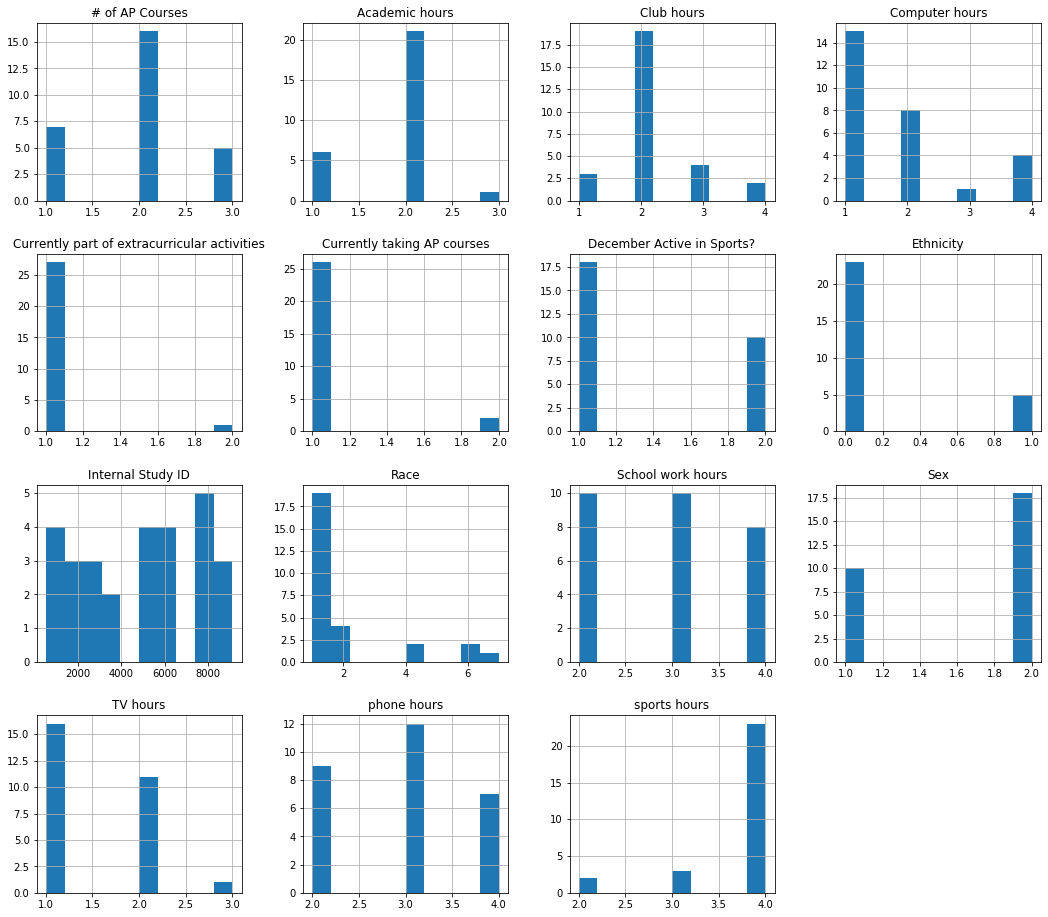

In [20]:
# social_demographics.hist() works for integer data, but does not work for categorical df
# but social_demographics.columnname.hist() works for categorial data
social_demographics.hist(figsize=(18,16))

In [9]:
from pandas.plotting import scatter_matrix
#import numpy as np
import seaborn as sns
#from matplotlib.ticker import FuncFormatter
#import IPython
#import warnings

In [10]:
corr_matrix = social_demographics.corr()
# set_precision define the decimal numbers
corr_matrix.style.background_gradient().set_precision(2)

,Internal Study ID,Race,Ethnicity,Sex,Currently taking AP courses,# of AP Courses,Currently part of extracurricular activities,Club hours,Academic hours,sports hours,December Active in Sports?,phone hours,TV hours,School work hours,Computer hours
Internal Study ID,1,-0.036,0.04,-0.01,0.4,-0.028,0.26,-0.24,0.35,0.072,0.44,0.27,0.079,-0.34,0.19
Race,-0.036,1,0.019,-0.33,-0.069,-0.23,0.0079,-0.019,-0.016,-0.2,-0.14,-0.2,0.14,-0.11,0.27
Ethnicity,0.04,0.019,1,-0.43,-0.13,-0.092,-0.09,0.014,-0.021,-0.28,0.24,0.17,0.28,0.042,-0.083
Sex,-0.01,-0.33,-0.43,1,0.21,0.033,0.14,-0.023,-0.13,0.065,-0.067,0.028,-0.31,0.21,-0.22
Currently taking AP courses,0.4,-0.069,-0.13,0.21,1,-0.18,0.69,0.13,0.11,0.12,0.083,-0.16,0.26,-0.32,0.057
# of AP Courses,-0.028,-0.23,-0.092,0.033,-0.18,1,0.021,-0.05,0.076,0.24,-0.033,-0.23,-0.2,0.33,-0.39
Currently part of extracurricular activities,0.26,0.0079,-0.09,0.14,0.69,0.021,1,-0.048,0.074,0.084,0.26,0.018,0.18,-0.22,0.039
Club hours,-0.24,-0.019,0.014,-0.023,0.13,-0.05,-0.048,1,-0.33,0.11,-0.19,-0.24,-0.21,-0.17,0.051
Academic hours,0.35,-0.016,-0.021,-0.13,0.11,0.076,0.074,-0.33,1,0.23,0.13,0.27,0.043,0.062,-0.0052
sports hours,0.072,-0.2,-0.28,0.065,0.12,0.24,0.084,0.11,0.23,1,0.32,0.12,-0.41,0.12,-0.089


### Save the files into base_cleaned and base_integer

In [ ]:
social_demographics = social_demographics.astype('int64')

### Speparate target column, and split into training and test set

In [340]:
social_demographics["Ethnicity"] = social_demographics["Ethnicity"].astype("category")

In [341]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(social_demographics, test_size = 0.2, stratify = social_demographics.Ethnicity, random_state=42)

In [342]:
X_train = train.drop(columns = ["Ethnicity"])
X_test = test.drop(columns = ["Ethnicity"])
y_train = train["Ethnicity"]
y_test = test["Ethnicity"]


from sklearn.metrics import roc_auc_score
y_probas = logreg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_probas)

from sklearn.metrics import roc_curve
fpr, tpr, threshold = metrics.roc_curve(y_test, y_probas)
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

import scikitplot as skplt
y_true = y_test  #ground truth labels
y_probas = logreg.predict_proba(X_test) # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc(y_true, y_probas)
plt.title('ROC Curve of Logistic Regression')
plt.show()

### Set up numeric pipeline and categorical pipeline and combine them to a full_process_pipeline
Define the column name of numeric attributes and categorial attributes separeately

In [343]:
feature_names = X_train.columns
print(feature_names)

Index(['Race', 'Sex', 'Currently taking AP courses', '# of AP Courses',
       'Currently part of extracurricular activities', 'Club hours',
       'Academic hours', 'sports hours', 'December Active in Sports?',
       'phone hours', 'TV hours', 'School work hours', 'Computer hours'],
      dtype='object')


In [344]:
cat_attributes = ["Race", "Sex", "Currently taking AP courses", "Currently part of extracurricular activities", "December Active in Sports?"]
num_attributes = [name for name in feature_names if name not in cat_attributes]
print(cat_attributes)
print(num_attributes)

['Race', 'Sex', 'Currently taking AP courses', 'Currently part of extracurricular activities', 'December Active in Sports?']
['# of AP Courses', 'Club hours', 'Academic hours', 'sports hours', 'phone hours', 'TV hours', 'School work hours', 'Computer hours']


In [345]:
# Avoid error in encoding floating data, convert the categorical features into integer
for name in cat_attributes:
    X_train[name] = X_train[name].astype("int")
    X_test[name] = X_test[name].astype("int")

In [346]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [347]:
num_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("encoder", OneHotEncoder(categories='auto'))
])

In [348]:
process_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attributes),
    ('cat', cat_pipeline, cat_attributes) 
])

X_train_prepared = process_pipeline.fit_transform(X_train)

In [349]:
X_test_prepared = process_pipeline.transform(X_test)

### Try predict ethnicity or race using logistic regression
1. separate features and label
2. split train and test

In [350]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1, penalty="l1")
logreg.fit(X_train_prepared, y_train)
print("Training accuracy is: ", logreg.score(X_train_prepared, y_train))
print("Testing accuracy is: ", logreg.score(X_test_prepared, y_test))

Training accuracy is:  0.9047619047619048
Testing accuracy is:  0.8333333333333334


In [351]:
print(list(logreg.coef_[0]))

[0.0, 0.0, -0.34410197921015856, 0.0, 0.5289707268186805, 0.0, 0.09691521549132273, -0.3490627165670238, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.8282781218000829, 0.0, 0.0, 0.0, 0.0, -0.6679199115798239, 0.0]


In [352]:
print(np.std(X_train_prepared, 0)*logreg.coef_)

[[ 0.          0.         -0.34410198  0.          0.52897073  0.
   0.09691522 -0.34906272  0.          0.          0.          0.
   0.          0.         -0.40222917  0.          0.          0.
   0.         -0.31486047  0.        ]]


In [353]:
def get_column_names_from_ColumnTransformer(column_transformer):    
    col_name = []
    for transformer_in_columns in column_transformer.transformers_:#the last transformer is ColumnTransformer's 'remainder'
        raw_col_name = transformer_in_columns[2]
        if isinstance(transformer_in_columns[1],Pipeline): 
            transformer = transformer_in_columns[1].steps[-1][1]
        else:
            transformer = transformer_in_columns[1]
        try:
            names = transformer.get_feature_names()
        except AttributeError: # if no 'get_feature_names' function, use raw column name
            names = raw_col_name
        if isinstance(names,np.ndarray): # eg.
            col_name += names.tolist()
        elif isinstance(names,list):
            col_name += names    
        elif isinstance(names,str):
            col_name.append(names)
    return col_name

In [354]:
print(logreg.verbose)

0


In [355]:
feature_names = get_column_names_from_ColumnTransformer(process_pipeline)

In [356]:
coefficients = pd.concat([pd.DataFrame(feature_names),pd.DataFrame(np.transpose(logreg.coef_))], axis = 1)

In [357]:
coefficients

,0,0
0,# of AP Courses,0.000000
1,Club hours,0.000000
2,Academic hours,-0.344102
3,sports hours,0.000000
4,phone hours,0.528971
5,TV hours,0.000000
6,School work hours,0.096915
7,Computer hours,-0.349063
8,x0_1,0.000000
9,x0_2,0.000000


In [359]:
y_probas = logreg.predict_proba(X_test_prepared)[:,1]
print(roc_auc_score(y_test, y_probas))

0.6


/Users/pengl/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


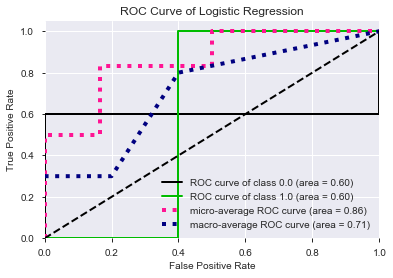

In [360]:
import scikitplot as skplt
y_true = y_test  #ground truth labels
y_probas = logreg.predict_proba(X_test_prepared) # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.title('ROC Curve of Logistic Regression')
plt.show()